### Hubungan Pendapatan, Tingkat Pendidikan, Urbanisasi, dan Wilayah

**Modules & Setup**

In [ ]:
from statsmodels.compat import lzip
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.formula.api import rlm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

df = pd.read_csv("homework_4.csv")
df.head()

,region1,region2,exp_cap,log_exp_cap,perc_urban,perc_formal,perc_smp,perc_sma
0,Indonesia Barat,Jawa,646385.88,13.379152,0.193047,0.183248,0.231933,0.122379
1,Indonesia Barat,Jawa,706967.25,13.468740,0.296873,0.233462,0.345096,0.209374
2,Indonesia Barat,Jawa,715120.56,13.480206,0.401314,0.376168,0.281570,0.154622
3,Indonesia Barat,Jawa,729812.81,13.500544,0.300492,0.461951,0.271773,0.131751
4,Indonesia Barat,Jawa,739466.88,13.513685,0.301216,0.336419,0.359085,0.169089


**1. *Scatterplot***

Asumsikan bahwa variabel `log_exp_cap` digunakan untuk merepresentasikan tingkat pendapatan per kapita, sedangkan variabel `perc_smp` digunakan untuk merepresentasikan tingkat pendidikan. Lakukan inspeksi data secara visual terlebih dahulu dengan melihat *scatterplot* yang menunjukkan korelasi antara `log_exp_cap` dan `perc_smp`, `log_exp_cap` dan `perc_urban`, serta `perc_smp` dan `perc_urban`.

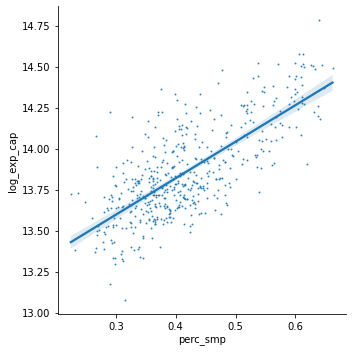

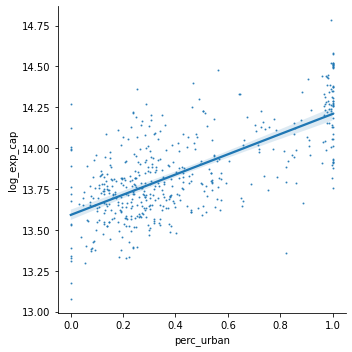

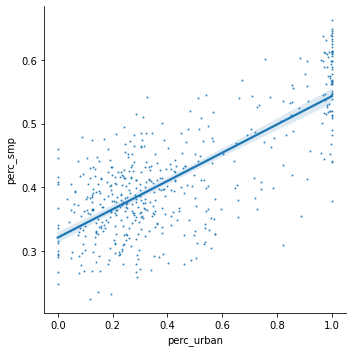

In [ ]:
sns.lmplot(x="perc_smp", y="log_exp_cap", data=df, scatter_kws={"s": 1})
sns.lmplot(x="perc_urban", y="log_exp_cap", data=df, scatter_kws={"s": 1})
sns.lmplot(x="perc_urban", y="perc_smp", data=df, scatter_kws={"s": 1})

**2. *Converting categorical variable into dummy variable***

Ubah kolom variabel `region1` menjadi *dummy variable* dengan `region1 = 0` untuk "Indonesia Timur" dan `region1 = 1` untuk "Indonesia Barat".

In [ ]:
df['region1'] = df['region1'].map({'Indonesia Timur': 0, 'Indonesia Barat': 1})

**3. *Converting categorical variable into dummy variable***
Ubah kolom variabel `region2` menjadi *dummy variable* dengan `region2 = 0` untuk wilayah "Sumatera", `region2 = 1` untuk wilayah "Jawa", `region2 = 2` untuk wilayah "Kalimantan", `region2 = 3` untuk wilayah "Bali & Nusa Tenggara", `region2 = 4` untuk wilayah "Sulawesi", dan `region2 = 5` untuk wilayah "Maluku & Papua".

In [ ]:
df['region2'] = df['region2'].map({'Sumatera': 0, 'Jawa': 1, 'Kalimantan': 2, 'Bali & Nusa Tenggara': 3, 'Sulawesi': 4, 'Maluku & Papua': 5})

**4. *Creating dummy variable from numerical variable***

Ciptakan *dummy variable* baru `urban` untuk menandakan apakah suatu kota/kabupaten memiliki tingkat urbanisasi rendah, menengah, atau tinggi. Kabupaten/kota memiliki tingkat urbanisasi rendah (`urban = 0`) jika persentase penduduk di kabupaten/kota yang tinggal di daerah perkotaan kurang dari 20%, memiliki tingkat urbanisasi menengah (`urban = 1`) jika persentase bernilai 20% sampai 60%, dan memiliki tingkat urbanisasi tinggi (`urban = 2`) jika persentase lebih dari 60%.

In [ ]:
df = df.assign(urban=pd.cut(df['perc_urban'],
                               bins=[-0.1, 0.2, 0.6, 1.0], labels=range(3)))

**5. Lakukan regresi `exp_cap` terhadap variabel `perc_smp`,`perc_sma`, `urban`, dan `region2` sesuai *functional form* ($\delta$ adalah parameter untuk *dummy*) **$\text{Income}_i=\beta_0 + \beta_1\text{SMP}_i + \beta_2\text{SMA}_i + \sum_{n=0}^2\delta_n\text{Urban}_{n,i} + \sum_{r=0}^6\delta_r\text{Region2}_{r,i} + u_i$. **Lakukan pula tes heteroskedastisitas dan tes multikolinearitas**

**5a. *Basic Regression***

In [ ]:
mod = ols("exp_cap ~ perc_smp + perc_sma + C(urban) + C(region2)", data = df)
res_1 = mod.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                exp_cap   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          8.38e-114
Time:                        16:10:22   Log-Likelihood:                -6751.6
No. Observations:                 498   AIC:                         1.352e+04
Df Residuals:                     488   BIC:                         1.357e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.172e+05   7.63e+04     

**5b. *Heteroskedasticity Test (Breusch-Pagan Test)***

In [ ]:
hettest = pd.DataFrame()

hettest["Tests"] = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
hettest["Values"] = sms.het_breuschpagan(res_1.resid, res_1.model.exog)
hettest

,Tests,Values
0,Lagrange multiplier statistic,5.327755e+01
1,p-value,2.589225e-08
2,f-value,6.495798e+00
3,f p-value,9.323221e-09


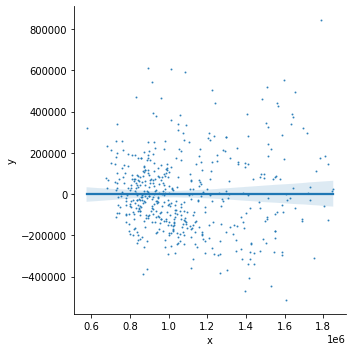

In [ ]:
out = pd.DataFrame()
out["y"] = res_1.resid
out["x"] = res_1.fittedvalues

sns.lmplot(x="x", y="y", data=out, scatter_kws={"s": 1})


**5c. *Multicollinearity Test (Variance Inflation Factor)***

In [ ]:
vif=pd.DataFrame()
vif["Variables"]=res_1.model.exog_names

variables = res_1.model.exog
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif

,Variables,VIF
0,Intercept,81.313391
1,C(urban)[T.1],1.719214
2,C(urban)[T.2],3.730082
3,C(region2)[T.1],1.624932
4,C(region2)[T.2],1.206611
5,C(region2)[T.3],1.301353
6,C(region2)[T.4],1.271064
7,C(region2)[T.5],1.097858
8,perc_smp,20.850568
9,perc_sma,22.331008


**6. Kita ingin melihat apakah transformasi variabel menjadi `log_exp_cap` menurunkan heteroskedastisitas dan membuat error terdistribusi normal. Lakukan regresi `log_exp_cap` terhadap variabel `perc_smp`,`perc_sma`, `urban`, dan `region2` sesuai *functional form* ($\delta$ adalah parameter untuk *dummy*)** $\log(\text{Income}_i)=\beta_0 + \beta_1\text{SMP}_i + \beta_2\text{SMA}_i + \sum_{n=0}^2\delta_n\text{Urban}_{n,i} + \sum_{r=0}^6\delta_r\text{Region2}_{r,i} + u_i$. **Lakukan pula tes heteroskedastisitas dan tes multikolinearitas.**

**6a. *Ubah dari Lin ke Log***

In [ ]:
mod_2 = ols("log_exp_cap ~ perc_smp + perc_sma + C(urban) + C(region2)", data = df)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:            log_exp_cap   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.03e-111
Time:                        16:15:24   Log-Likelihood:                 202.35
No. Observations:                 498   AIC:                            -384.7
Df Residuals:                     488   BIC:                            -342.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2924      0.066    2

**6b. *Heteroskedasticity Test (Breusch-Pagan Test)***

In [ ]:
import statsmodels.stats.api as sms
hettest = pd.DataFrame()

hettest["Tests"] = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
hettest["Values"] = sms.het_breuschpagan(res_2.resid, res_2.model.exog)
hettest

,Tests,Values
0,Lagrange multiplier statistic,35.547601
1,p-value,0.000048
2,f-value,4.167932
3,f p-value,0.000034


**6c. *Multicollinearity Test (Variance Inflation Factor)***

In [ ]:
vif=pd.DataFrame()
vif["Variables"]=res_2.model.exog_names

variables = res_2.model.exog
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif

,Variables,VIF
0,Intercept,81.313391
1,C(urban)[T.1],1.719214
2,C(urban)[T.2],3.730082
3,C(region2)[T.1],1.624932
4,C(region2)[T.2],1.206611
5,C(region2)[T.3],1.301353
6,C(region2)[T.4],1.271064
7,C(region2)[T.5],1.097858
8,perc_smp,20.850568
9,perc_sma,22.331008


**7. Sekarang, kita akan melakukan regresi dengan menggunakan interaction terms. Lakukan interaksi antara `region2` dan `perc_sma`. Kalian bisa hilangkan variabel `perc_smp` karena kalian bisa melihat bahwa keduanya memiliki multikolinearitas tinggi dan memberikan informasi yang mirip. Lakukan regresi sesuai dengan di nomor (6), namun dengan menggunakan *functional form* berikut: ($\delta$ adalah parameter untuk *dummy*) **$\log(\text{Income}_i)=\beta_0 + \beta_1\text{SMA}_i + \sum_{n=0}^2\delta_n\text{Urban}_{n,i} + \sum_{r=0}^6\delta_r\text{Region2}_{r,i} + u_i + \sum_{x=0}^6\delta_r\text{Region2}_{x,i}\times \text{SMA}_i$  . **Lakukan pula tes heteroskedastisitas dan tes multikolinearitas.**

**7a. *Interaction + Drop perc_smp***

In [ ]:
mod_3 = ols("log_exp_cap ~ perc_sma + C(urban) + C(region2) + C(region2) : perc_sma", data = df)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:            log_exp_cap   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     79.21
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          8.48e-111
Time:                        16:26:45   Log-Likelihood:                 211.55
No. Observations:                 498   AIC:                            -395.1
Df Residuals:                     484   BIC:                            -336.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**7b. *Heteroskedasticity Test (Breusch-Pagan Test)***

In [ ]:
import statsmodels.stats.api as sms
hettest = pd.DataFrame()

hettest["Tests"] = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
hettest["Values"] = sms.het_breuschpagan(res_3.resid, res_3.model.exog)
hettest

,Tests,Values
0,Lagrange multiplier statistic,21.197899
1,p-value,0.069106
2,f-value,1.655224
3,f p-value,0.067368


**7c. *Multicollinearity Test (Variance Inflation Factor)***

In [ ]:
vif=pd.DataFrame()
vif["Variables"]=res_3.model.exog_names

variables = res_3.model.exog
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif

,Variables,VIF
0,Intercept,36.599087
1,C(urban)[T.1],1.848016
2,C(urban)[T.2],3.830374
3,C(region2)[T.1],11.855647
4,C(region2)[T.2],12.980355
5,C(region2)[T.3],9.790759
6,C(region2)[T.4],14.625388
7,C(region2)[T.5],12.283092
8,perc_sma,4.856028
9,C(region2)[T.1]:perc_sma,11.643599


**8. *Interaction + Drop perc_smp + Robust Standard Error***

Lakukan regresi di nomor (7) dengan menggunakan MacKinnon and White’s (1985) heteroskedasticity robust standard errors (gunakan `cov_type='HC3'` ketika kalian melakukan *model fitting*).

In [ ]:
mod_4 = ols("log_exp_cap ~ perc_sma + C(urban) + C(region2) + C(region2) : perc_sma", data = df)
res_4 = mod_4.fit(cov_type='HC3')
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:            log_exp_cap   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     87.64
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          4.55e-118
Time:                        16:31:08   Log-Likelihood:                 211.55
No. Observations:                 498   AIC:                            -395.1
Df Residuals:                     484   BIC:                            -336.1
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**9. *Interaction + Add `perc_formal` + Robust Standard Error***



In [ ]:
mod_5 = ols("log_exp_cap ~ perc_sma + perc_formal + C(urban) + C(region2) + C(region2) : perc_sma", data = df)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:            log_exp_cap   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     96.73
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          3.66e-130
Time:                        16:36:09   Log-Likelihood:                 260.29
No. Observations:                 498   AIC:                            -490.6
Df Residuals:                     483   BIC:                            -427.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               


- adjusted r^2 meningkat brarti variabel perc_formal berpengaruh terhadap model
- parameter estimasi untuk variabel perc_sma menurun saat menambah variabel perc_formal berarti banyak lulusan SMA yang yang bekerja di sektor formal
- dengan aproksimasi setiap 1% kenaikan penduduk yang telah menyelesaikan min SMA di pulau Jawa lebih tinggi `0.7083*100%*0.01 = 0.7083%` dibandingkan Sumatera (baseline)
